In [ ]:
# 07/11/2024

import pandas as pd
import numpy as np
import seaborn as sns

E003. Incidencias de tráfico. Utilizando los datos disponibles para en https://informo.madrid.es/informo/tmadrid/incid_aytomadrid.xml, crea un gráfico de barras con el número de incidencias de cada tipo.

In [ ]:
url = 'https://informo.madrid.es/informo/tmadrid/incid_aytomadrid.xml'

# el parse es opcional
incidencias = pd.read_xml(url, parse_dates = ['fh_inicio', 'fh_final'])
incidencias.head()

,id_incidencia,codigo,cod_tipo_incidencia,nom_tipo_incidencia,fh_inicio,fh_final,incid_prevista,incid_planificada,incid_estado,descripcion,...,latitud,tipoincid,es_obras,es_accidente,es_contaminacion,escenario_contaminacion,fecha_escenario_contaminacion,descripcion_escenario,medidas_escenario,excepciones_escenario
0,35448,2024/734,RWL,Obras de larga duración en la vía,2024-02-26 12:20:00,2026-03-31 14:20:00,S,N,1,Marques de Jura Real / Baleares. Motivo: Obras...,...,40.390607,1,S,N,N,NaN,NaN,NaN,NaN,NaN
1,35554,2024/840,RWK,Obras en la vía,2024-04-15 23:00:00,2025-04-19 06:00:00,S,N,1,Túnel de Comercio - Méndez Álvaro. Previsión d...,...,40.400830,1,S,N,N,NaN,NaN,NaN,NaN,NaN
2,35856,2024/1142,RWL,Obras de larga duración en la vía,2024-04-15 10:20:00,2025-04-15 23:59:00,S,N,1,Calle Illescas. Obras en varias fases del Cana...,...,40.394611,1,S,N,N,NaN,NaN,NaN,NaN,NaN
3,36425,2024/1711,RWK,Obras en la vía,2024-06-17 00:01:00,2024-12-05 23:59:00,S,N,1,"Paseo de San Francisco de Sales, ocupación tem...",...,40.442302,1,S,N,N,NaN,NaN,NaN,NaN,NaN
4,36513,2024/1799,RWK,Obras en la vía,2024-06-18 13:15:40,2024-06-18 13:15:40,N,N,1,"HERMANOS GARCIA NOBLEJAS CON ARCENTALES, CARRI...",...,40.424971,1,S,N,N,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cod_tipo_incidencia', ylabel='count'>

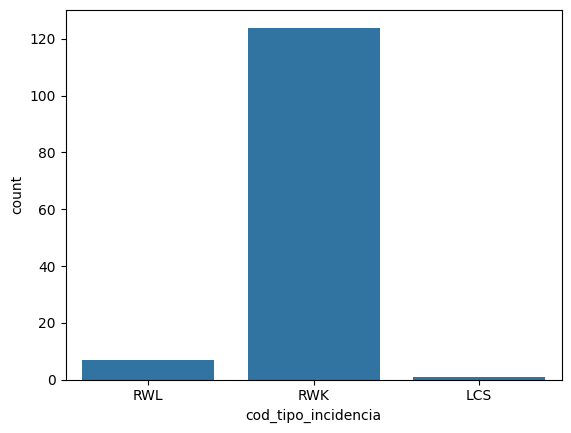

In [ ]:
sns.countplot(
    data=incidencias,
    x='cod_tipo_incidencia'
)

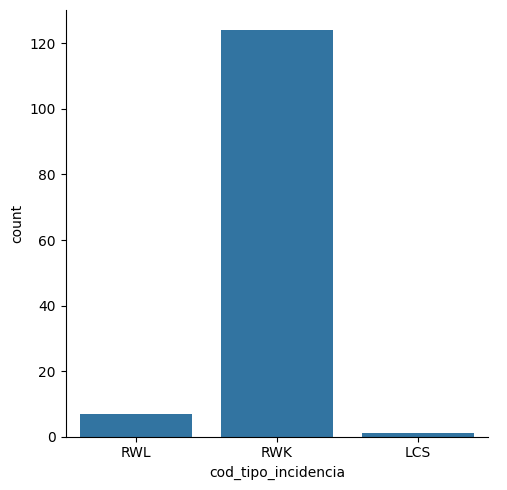

In [ ]:
sns.catplot(
    data = incidencias,
    x = "cod_tipo_incidencia",
    kind = "count"
)

In [ ]:
incidencias["duracion"] = (incidencias.fh_final - incidencias.fh_inicio)
incidencias["duracionDias"] = incidencias["duracion"]  / pd.Timedelta(days=1)
incidencias.head()

,id_incidencia,codigo,cod_tipo_incidencia,nom_tipo_incidencia,fh_inicio,fh_final,incid_prevista,incid_planificada,incid_estado,descripcion,...,es_obras,es_accidente,es_contaminacion,escenario_contaminacion,fecha_escenario_contaminacion,descripcion_escenario,medidas_escenario,excepciones_escenario,duracion,duracionDias
0,35448,2024/734,RWL,Obras de larga duración en la vía,2024-02-26 12:20:00,2026-03-31 14:20:00,S,N,1,Marques de Jura Real / Baleares. Motivo: Obras...,...,S,N,N,NaN,NaN,NaN,NaN,NaN,764 days 02:00:00,764.083333
1,35554,2024/840,RWK,Obras en la vía,2024-04-15 23:00:00,2025-04-19 06:00:00,S,N,1,Túnel de Comercio - Méndez Álvaro. Previsión d...,...,S,N,N,NaN,NaN,NaN,NaN,NaN,368 days 07:00:00,368.291667
2,35856,2024/1142,RWL,Obras de larga duración en la vía,2024-04-15 10:20:00,2025-04-15 23:59:00,S,N,1,Calle Illescas. Obras en varias fases del Cana...,...,S,N,N,NaN,NaN,NaN,NaN,NaN,365 days 13:39:00,365.568750
3,36425,2024/1711,RWK,Obras en la vía,2024-06-17 00:01:00,2024-12-05 23:59:00,S,N,1,"Paseo de San Francisco de Sales, ocupación tem...",...,S,N,N,NaN,NaN,NaN,NaN,NaN,171 days 23:58:00,171.998611
4,36513,2024/1799,RWK,Obras en la vía,2024-06-18 13:15:40,2024-06-18 13:15:40,N,N,1,"HERMANOS GARCIA NOBLEJAS CON ARCENTALES, CARRI...",...,S,N,N,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,0.000000


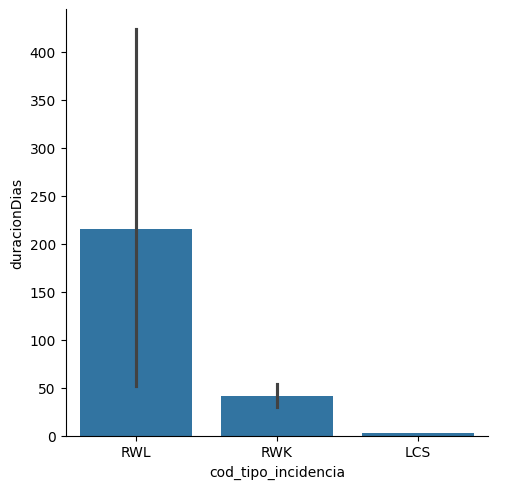

In [ ]:
sns.catplot(
    incidencias,
    x = "cod_tipo_incidencia",
    y = "duracionDias",
    kind = 'bar'
)